## KNN DIABETES DETECTION

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [81]:
db=pd.read_csv("diabetes.csv")
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [51]:
db.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [52]:
db[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = db[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan)
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [53]:
db['Glucose'].fillna(db['Glucose'].mean(skipna=True), inplace=True)
db['BloodPressure'].fillna(db['BloodPressure'].mean(skipna=True), inplace=True)
db['SkinThickness'].fillna(db['SkinThickness'].mean(skipna=True), inplace=True)
db['Insulin'].fillna(db['Insulin'].mean(skipna=True), inplace=True)
db['BMI'].fillna(db['BMI'].mean(skipna=True), inplace=True)
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [54]:
X=db.iloc[:,:-1]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [55]:
y=db.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)>

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.30, random_state=42)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
334,1,95.0,60.000000,18.00000,58.000000,23.9,0.260,22
139,5,105.0,72.000000,29.00000,325.000000,36.9,0.159,28
485,0,135.0,68.000000,42.00000,250.000000,42.3,0.365,24
547,4,131.0,68.000000,21.00000,166.000000,33.1,0.160,28
18,1,103.0,30.000000,38.00000,83.000000,43.3,0.183,33
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.00000,140.000000,28.6,0.411,26
106,1,96.0,122.000000,29.15342,155.548223,22.4,0.207,27
270,10,101.0,86.000000,37.00000,155.548223,45.6,1.136,38
435,0,141.0,72.405184,29.15342,155.548223,42.4,0.205,29


In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
ss=StandardScaler()
ss

StandardScaler()

In [60]:
X_train= ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

In [62]:
classifier=KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [63]:
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [64]:
pred=classifier.predict(X_test)
pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [65]:
cm=confusion_matrix(y_test,pred)
cm

array([[121,  30],
       [ 31,  49]], dtype=int64)

In [66]:
acc=accuracy_score(y_test,pred)
acc

0.7359307359307359

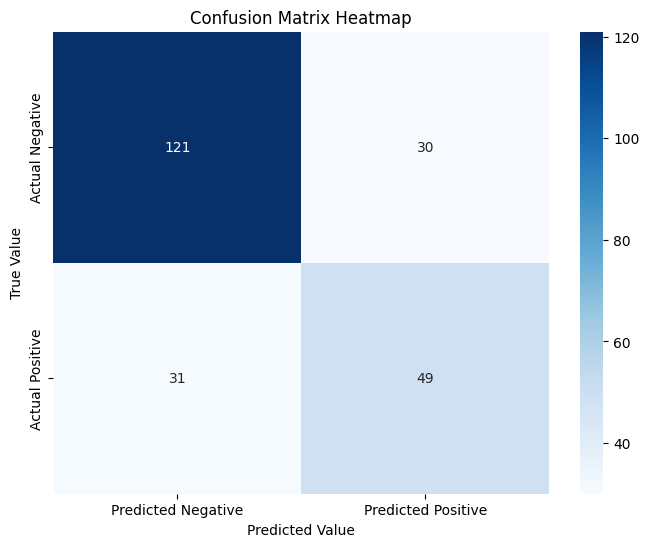

In [70]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Value')
plt.ylabel('True Value')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [72]:
f1 = f1_score(y_test,pred)
f1

0.6163522012578616

In [73]:
db.iloc[:700]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.000000,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.000000,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.000000,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.000000,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
695,7,142.0,90.000000,24.00000,480.000000,30.4,0.128,43,1
696,3,169.0,74.000000,19.00000,125.000000,29.9,0.268,31,1
697,0,99.0,72.405184,29.15342,155.548223,25.0,0.253,22,0
698,4,127.0,88.000000,11.00000,155.000000,34.5,0.598,28,0


In [74]:
db = db.drop(['Age'],axis=1)
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,1


In [76]:
filtered_db = db[db['Outcome'] == 1]
filtered_db 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,1
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,1
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,1
6,3,78.0,50.0,32.00000,88.000000,31.0,0.248,1
8,2,197.0,70.0,45.00000,543.000000,30.5,0.158,1
...,...,...,...,...,...,...,...,...
755,1,128.0,88.0,39.00000,110.000000,36.5,1.057,1
757,0,123.0,72.0,29.15342,155.548223,36.3,0.258,1
759,6,190.0,92.0,29.15342,155.548223,35.5,0.278,1
761,9,170.0,74.0,31.00000,155.548223,44.0,0.403,1


In [77]:
db['SumAll'] = db.sum(axis=1)

In [78]:
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome,SumAll
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,1,451.775223
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,0,363.499223
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,1,464.673643
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,0,301.267000
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,1,426.388000
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,0,448.071000
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,0,413.688223
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,0,359.445000
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,1,403.150643


In [82]:
db["Sum"] = db[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].sum(axis=1)

In [83]:
db

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Sum
0,6,148,72,35,0,33.6,0.627,50,1,288.6
1,1,85,66,29,0,26.6,0.351,31,0,206.6
2,8,183,64,0,0,23.3,0.672,32,1,270.3
3,1,89,66,23,94,28.1,0.167,21,0,300.1
4,0,137,40,35,168,43.1,2.288,33,1,423.1
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,437.9
764,2,122,70,27,0,36.8,0.340,27,0,255.8
765,5,121,72,23,112,26.2,0.245,30,0,354.2
766,1,126,60,0,0,30.1,0.349,47,1,216.1
